#Directory, Libraries and Data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [ ]:
#libraries
import pandas as pd
import numpy as np

In [ ]:
#Load the Data
df = pd.read_csv("marketing_campaign.csv")
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


#Data Preparation

In [ ]:
#Remove unwanted variables
df = df.iloc[:,2:]
df = df.drop(columns = ["Dt_Customer", "Recency"])
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


In [ ]:
#Transform Year of Birth into Age
df['age'] = 2020 - df.Year_Birth
df = df.drop(columns = 'Year_Birth')

In [ ]:
#Transform Objects 
df = pd.get_dummies(df, drop_first= True)

In [ ]:
#NAs
df = df.dropna()
df.isna().sum()

In [ ]:
#Isolate X and Y
y = df.Income
X = df.drop(columns = "Income")

In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Random Forest

In [ ]:
#Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300,
                              random_state =1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

#Accuracy Assessment

In [ ]:
#Predictions
predictions = model.predict(X_test)
predictions[:5]

array([66488.74      , 19450.09666667, 64682.58      , 49538.68666667,
       47827.66666667])

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6543.338626126127
50734.41891891892
22073.552789063204


#Feature Importance

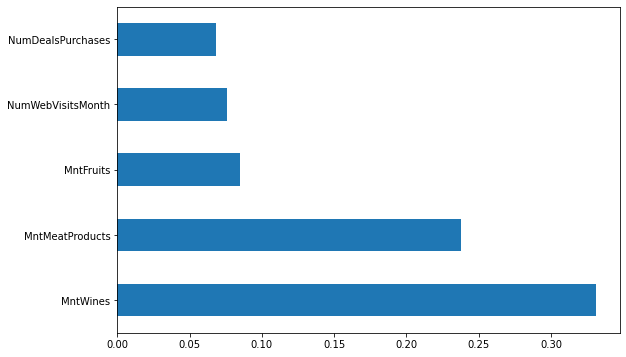

In [ ]:
#Importance plot
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = "barh",
                            figsize =(9,6))

#Parameter Tuning

In [ ]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50, 500, 20)}
grid = ParameterGrid(param_grid)

In [ ]:
#Parameter Tuning
mae = []

#Start the loop
for params in grid:
  #model building
  model = RandomForestRegressor(n_estimators= params['n_estimators'],
                                random_state = 1502)
  model.fit(X_train, y_train)

  #predictions
  predictions = model.predict(X_test)

  #Assess Accuracy
  error = mean_absolute_error(y_test, predictions)
  mae.append(error)

#best parameters
best_params = grid[np.argmin(error)]
print(best_params)

{'n_estimators': 50}
